In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_breast_cancer

import sys
sys.path.append("../suicide_project") # add parent directory to path for importing local modules

from bertsimas_stable.stable_trainer import StableTrainer

In [2]:
data_bc = load_breast_cancer(as_frame=True)
X_full = data_bc["data"]
y_full = data_bc["target"]

N_SPLITS = 10
test_size = 0.33

cart_accuracies = []
rf_accuracies = []
stable_accuracies = []
stable_distances = []
cart_trees = []
rf_trees = []
stable_trees = []

In [ ]:
for i in range(N_SPLITS):
    X_train, X_test, y_train, y_test = train_test_split(
        X_full, y_full, test_size=test_size, random_state=i
    )
    
    cart = DecisionTreeClassifier(random_state=i)
    cart.fit(X_train, y_train)

    rf = RandomForestClassifier(random_state=i)
    rf.fit(X_train, y_train)
    
    """Need to make sure we are passing in train set and training collections on this only"""
    stable_model = StableTrainer(depths=[3,5,7], min_samples_leaf=[5,10], random_state=i, max_depth_for_lambda=7)
    stable_model.fit(X_train, y_train, X_full, y_full, X_test, y_test)
    
    cart_y_pred = cart.predict(X_test)
    cart_acc = accuracy_score(y_test, cart_y_pred)
    cart_accuracies.append(cart_acc)
    cart_trees.append(cart)
    
    rf_y_pred = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_y_pred)
    rf_accuracies.append(rf_acc)
    rf_trees.append(rf)
    
    stable_y_pred = stable_model.predict(X_test)
    stable_acc = accuracy_score(y_test, stable_y_pred)
    stable_accuracies.append(stable_acc)
    stable_trees.append(stable_model)
    
    # 6) If you measure stability distance for the stable model, do it here
    # For example, if measuring average distance to some baseline T0:
    # stable_dist = measure_distance(stable_model, T0_list, global_lower, global_upper)
    # stable_distances.append(stable_dist)

[INFO] Final chosen stable tree index = 3, distance = 7.2107, perf = 0.9734
[INFO] Final chosen stable tree index = 3, distance = 6.0946, perf = 0.9415
[INFO] Final chosen stable tree index = 3, distance = 7.4829, perf = 0.9468
[INFO] Final chosen stable tree index = 2, distance = 9.0173, perf = 0.9894
[INFO] Final chosen stable tree index = 2, distance = 6.3415, perf = 0.9787
[INFO] Final chosen stable tree index = 1, distance = 7.8337, perf = 0.9840
[INFO] Final chosen stable tree index = 1, distance = 5.5471, perf = 0.9521
[INFO] Final chosen stable tree index = 0, distance = 11.1278, perf = 0.9894
[INFO] Final chosen stable tree index = 2, distance = 7.9205, perf = 0.9840
[INFO] Final chosen stable tree index = 1, distance = 9.3276, perf = 0.9681


In [4]:
# After the loop, compute mean and std for each
cart_mean_acc, cart_std_acc = np.mean(cart_accuracies), np.std(cart_accuracies)
rf_mean_acc,   rf_std_acc   = np.mean(rf_accuracies),   np.std(rf_accuracies)
stable_mean_acc, stable_std_acc = np.mean(stable_accuracies), np.std(stable_accuracies)

# stable_dist_mean, stable_dist_std = np.mean(stable_distances), np.std(stable_distances)

print("==== Results over 10 splits (mean, stdev) ====")

summary_df = pd.DataFrame({
    'Model': ['CART', 'RandomForest', 'StableApproach'],
    'MeanAcc': [cart_mean_acc, rf_mean_acc, stable_mean_acc],
    'StdAcc':  [cart_std_acc, rf_std_acc, stable_std_acc],
    # 'MeanDist': [...],
    # 'StdDist':  [...],
})
summary_df

==== Results over 10 splits (mean, stdev) ====


,Model,MeanAcc,StdAcc
0,CART,0.930319,0.007690
1,RandomForest,0.960638,0.010953
2,StableApproach,0.970745,0.017030


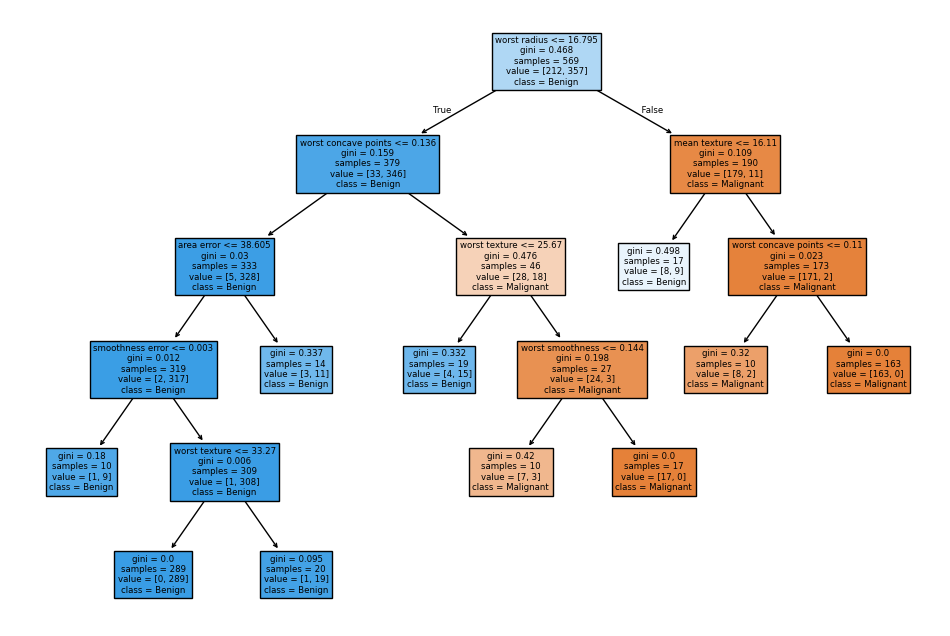

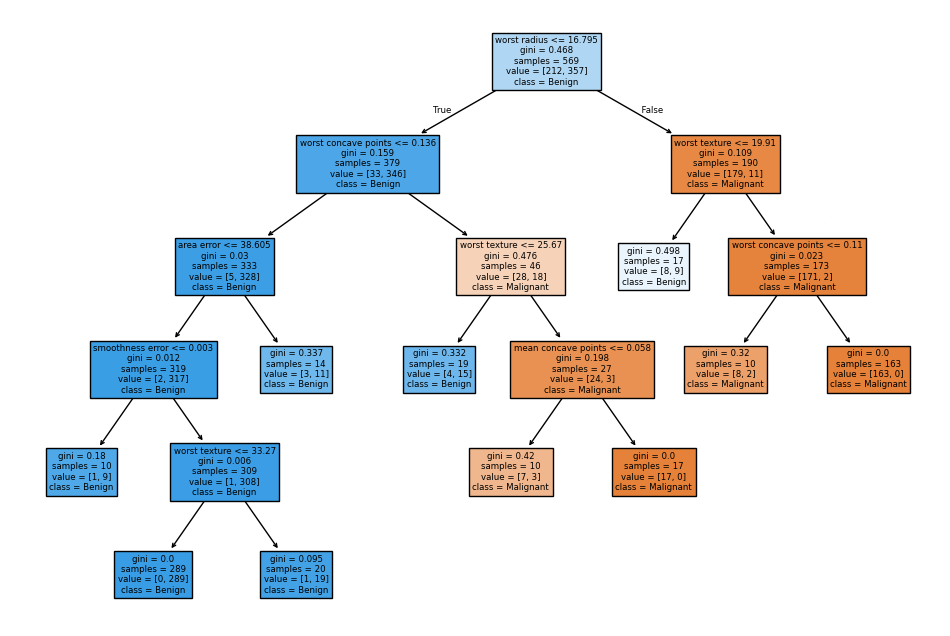

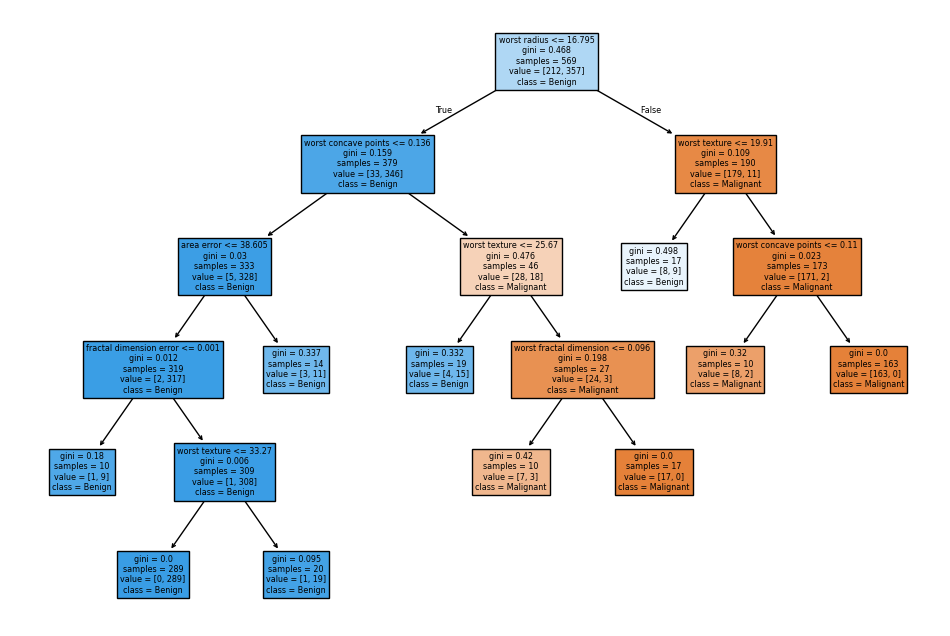

In [5]:
# stab.plot_stable_tree(feature_names=X_full.columns, 
#                          class_names=["Malignant","Benign"])
# plot first 3 stable trees
for i in range(3):
    img = stable_trees[i].plot_stable_tree(feature_names=X_full.columns, 
                                     class_names=["Malignant","Benign"])

In [6]:
# print("Distances:", trainer.distances_)
# print("Performances:", trainer.performances_)
# print("Pareto indices:", trainer.pareto_indices_)

In [7]:
# trainer.plot_stable_tree(feature_names=X_full.columns.tolist(),
#                          class_names=["Malignant", "Benign"])